<a href="https://colab.research.google.com/github/DrAlexSanz/NLP-SPEC-C3/blob/main/W3/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 3 - Named Entity Recognition (NER)
Welcome to the third programming assignment of Course 3. In this assignment, you will learn to build more complicated models with Trax. By completing this assignment, you will be able to:

* Design the architecture of a neural network, train it, and test it.
* Process features and represents them
* Understand word padding
* Implement LSTMs
* Test with your own sentence

## Introduction

We first start by defining named entity recognition (NER). NER is a subtask of information extraction that locates and classifies named entities in a text. The named entities could be organizations, persons, locations, times, etc.

For example:

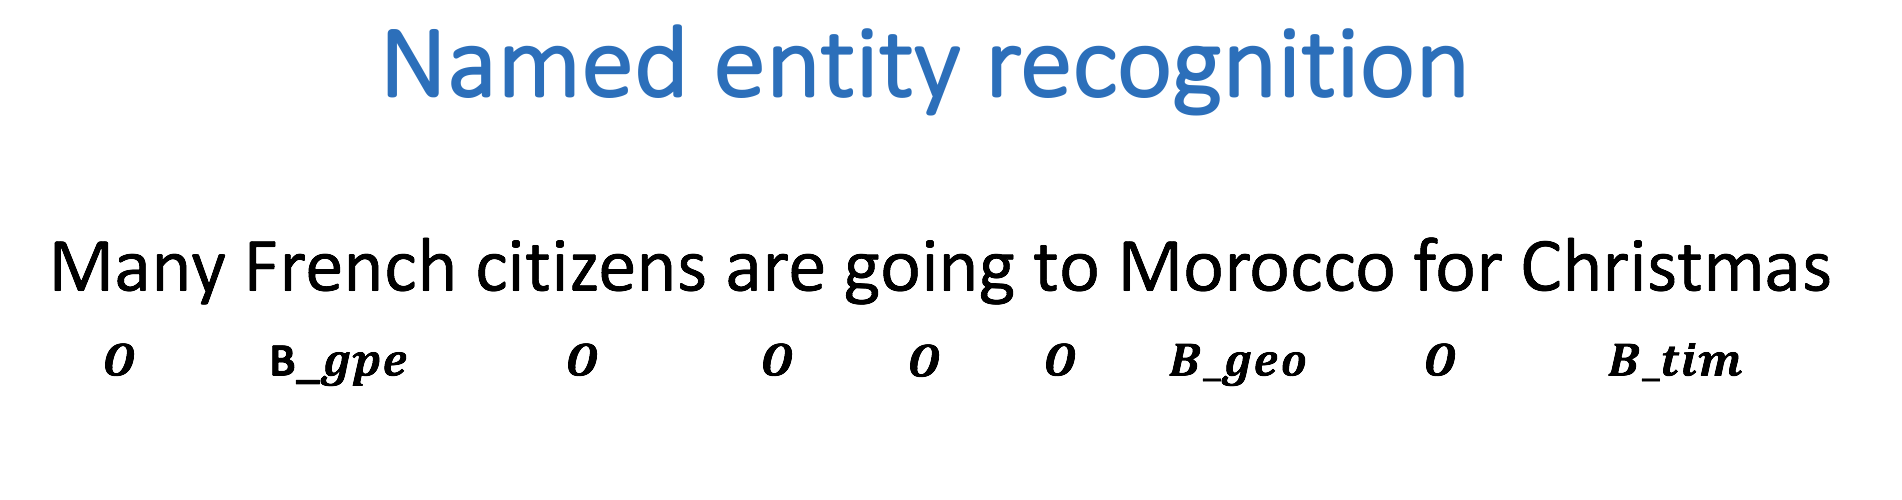

Is labeled as follows:

* French: geopolitical entity
* Morocco: geographic entity
* Christmas: time indicator

Everything else that is labeled with an O is not considered to be a named entity. In this assignment, you will train a named entity recognition system that could be trained in a few seconds (on a GPU) and will get around 75% accuracy. Then, you will load in the exact version of your model, which was trained for a longer period of time. You could then evaluate the trained version of your model to get 96% accuracy! Finally, you will be able to test your named entity recognition system with your own sentence.

In [5]:
#!pip install sentencepiece==0.1.91
!pip install trax==1.3.1

import trax

import os
import numpy
from trax import fastmath
from trax import layers as tl
import random as rnd
from trax.supervised import training
import numpy as np
import pandas as pd

from utils import get_params, get_vocab

In [2]:
%pwd

'/content'

In [3]:
# if os.path.exists("/content/Repo"):
#     %rm -rf "/content/Repo"
#     %cd "/content"
#     print("yes")

!git clone -l -s https://github.com/DrAlexSanz/NLP-SPEC-C3.git Repo
%cd Repo
%rm -rf W1
%rm -rf W2
%mv ./W3/* ./
%rm -rf W3

Cloning into 'Repo'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 214 (delta 17), reused 47 (delta 4), pack-reused 128
Receiving objects: 100% (214/214), 13.64 MiB | 19.45 MiB/s, done.
Resolving deltas: 100% (40/40), done.
/content/Repo


## Part 1: Exploring the data
We will be using a dataset from Kaggle, which we will preprocess for you. The original data consists of four columns, the sentence number, the word, the part of speech of the word, and the tags. A few tags you might expect to see are:

* geo: geographical entity
* org: organization
* per: person
* gpe: geopolitical entity
* tim: time indicator
* art: artifact
* eve: event
* nat: natural phenomenon
* O: filler word

In [9]:
data = pd.read_csv("ner_dataset.csv", encoding = "ISO-8859-1")

train_sentences = open("data/small/train/sentences.txt", "r").readline()
train_labels = open("data/small/train/labels.txt", "r").readline()

print(train_sentences)
print(train_labels)
print(data.head())
del data, train_sentences, train_labels

Thousands of demonstrators have marched through London to protest the war in Iraq and demand the withdrawal of British troops from that country .

O O O O O O B-geo O O O O O B-geo O O O O O B-gpe O O O O O

    Sentence #           Word  POS Tag
0  Sentence: 1      Thousands  NNS   O
1          NaN             of   IN   O
2          NaN  demonstrators  NNS   O
3          NaN           have  VBP   O
4          NaN        marched  VBN   O
